# Movie Recommendation System Using MovieLens 100K Dataset

**Author:** Mochammad Daffa Putra Karyudi  

---

## Project Overview

Di era digital saat ini, platform streaming film seperti Netflix, Hulu, dan Amazon Prime memiliki koleksi film yang sangat besar. Pengguna sering kali kesulitan menemukan film yang sesuai dengan preferensi mereka karena banyaknya pilihan yang tersedia. Oleh karena itu, sistem rekomendasi menjadi penting untuk membantu pengguna menemukan film yang mereka sukai.

Proyek ini bertujuan untuk membangun sistem rekomendasi film menggunakan dataset MovieLens. Dengan sistem ini, diharapkan pengguna dapat menerima rekomendasi film yang sesuai dengan preferensi mereka, meningkatkan kepuasan pengguna, dan meningkatkan engagement pada platform.

**Rubrik/Kriteria Tambahan (Opsional):**

- Menyelesaikan proyek ini penting karena sistem rekomendasi dapat meningkatkan pengalaman pengguna dan loyalitas terhadap platform. Menurut [Ricci et al. (2011)](https://link.springer.com/book/10.1007/978-0-387-85820-3), sistem rekomendasi membantu mengurangi information overload dan meningkatkan kepuasan pengguna.

---

## Business Understanding

### Problem Statements

1. **Bagaimana membangun sistem rekomendasi yang dapat memberikan saran film yang dipersonalisasi kepada pengguna?**
2. **Algoritma apa yang paling efektif untuk digunakan dalam sistem rekomendasi film pada dataset MovieLens?**
3. **Bagaimana cara mengevaluasi kinerja sistem rekomendasi yang dibangun?**

### Goals

1. **Mengembangkan sistem rekomendasi** yang dapat memberikan saran film berdasarkan preferensi pengguna.
2. **Membandingkan beberapa algoritma rekomendasi** untuk menentukan pendekatan terbaik.
3. **Mengevaluasi kinerja sistem rekomendasi** menggunakan metrik evaluasi yang sesuai.

### Solution Statements

1. **Mengimplementasikan algoritma Collaborative Filtering** (User-Based dan Item-Based).
2. **Mengimplementasikan teknik Matrix Factorization** menggunakan **Singular Value Decomposition (SVD)**.
3. **Mengevaluasi model** menggunakan metrik **Root Mean Square Error (RMSE)** dan **Precision@K**.

---

# Data Understanding

Dataset yang digunakan adalah **MovieLens 100K Dataset**, yang berisi 100.000 rating dari 943 pengguna terhadap 1.682 film. Dataset ini dapat diunduh di [MovieLens Dataset](https://grouplens.org/datasets/movielens/100k/).

Variabel-variabel pada dataset MovieLens adalah sebagai berikut:

- **user_id** : ID unik untuk setiap pengguna.
- **item_id** : ID unik untuk setiap film.
- **rating** : Rating yang diberikan pengguna (skala 1-5).
- **timestamp** : Waktu saat rating diberikan.

## 1. Importing Libraries and Loading Data

In [17]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# For modeling
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)

In [2]:
# Define column names
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

# Load ratings data
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=column_names)

# Load movies data
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', header=None, usecols=[0,1], names=['item_id', 'title'])

# Display first few rows of ratings
print("Ratings Data:")
ratings.head()


Ratings Data:


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
# Display first few rows of movies
print("Movies Data:")
movies.head()

Movies Data:


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


## 2. Data Overview

In [4]:
# Basic information about ratings
print("Ratings Data Info:")
ratings.info()


Ratings Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
# Basic information about movies
print("\nMovies Data Info:")
movies.info()


Movies Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [6]:
# Descriptive statistics for ratings
print("\nDescriptive Statistics for Ratings:")
ratings.describe()


Descriptive Statistics for Ratings:


,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


## 3. Checking for Missing Values

In [7]:
# Check for missing values in ratings
print("Missing Values in Ratings:")
print(ratings.isnull().sum())


Missing Values in Ratings:
user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64


In [8]:
# Check for missing values in movies
print("\nMissing Values in Movies:")
print(movies.isnull().sum())


Missing Values in Movies:
item_id    0
title      0
dtype: int64


## 4. Distribution of Ratings

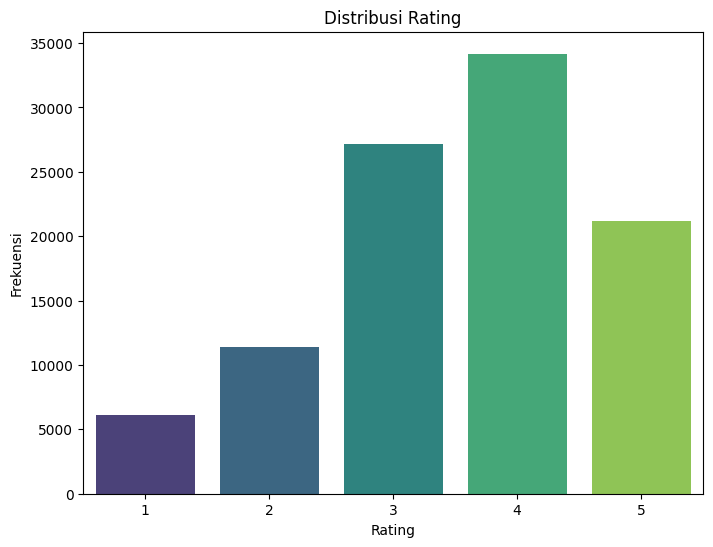

In [9]:
# Visualisasi distribusi rating
plt.figure(figsize=(8,6))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()


Insight: Mayoritas pengguna memberikan rating tertinggi pada angka 4 dan 3, menunjukkan bahwa penilaian film cenderung berada di tengah hingga positif. Hal ini mungkin mencerminkan preferensi pengguna yang lebih bijaksana atau adanya variasi dalam kualitas film yang ditonton.

## 5. Film Terpopuler

In [10]:
# Menghitung jumlah rating per film
movie_counts = ratings.groupby('item_id').size().sort_values(ascending=False)

# Menggabungkan dengan judul film
movie_counts = movie_counts.reset_index()
movie_counts.columns = ['item_id', 'rating_count']
movie_counts = pd.merge(movie_counts, movies, on='item_id')

# Menampilkan 10 film teratas
print("10 Film Terpopuler:")
movie_counts.head(10)


10 Film Terpopuler:


,item_id,rating_count,title
0,50,583,Star Wars (1977)
1,258,509,Contact (1997)
2,100,508,Fargo (1996)
3,181,507,Return of the Jedi (1983)
4,294,485,Liar Liar (1997)
5,286,481,"English Patient, The (1996)"
6,288,478,Scream (1996)
7,1,452,Toy Story (1995)
8,300,431,Air Force One (1997)
9,121,429,Independence Day (ID4) (1996)


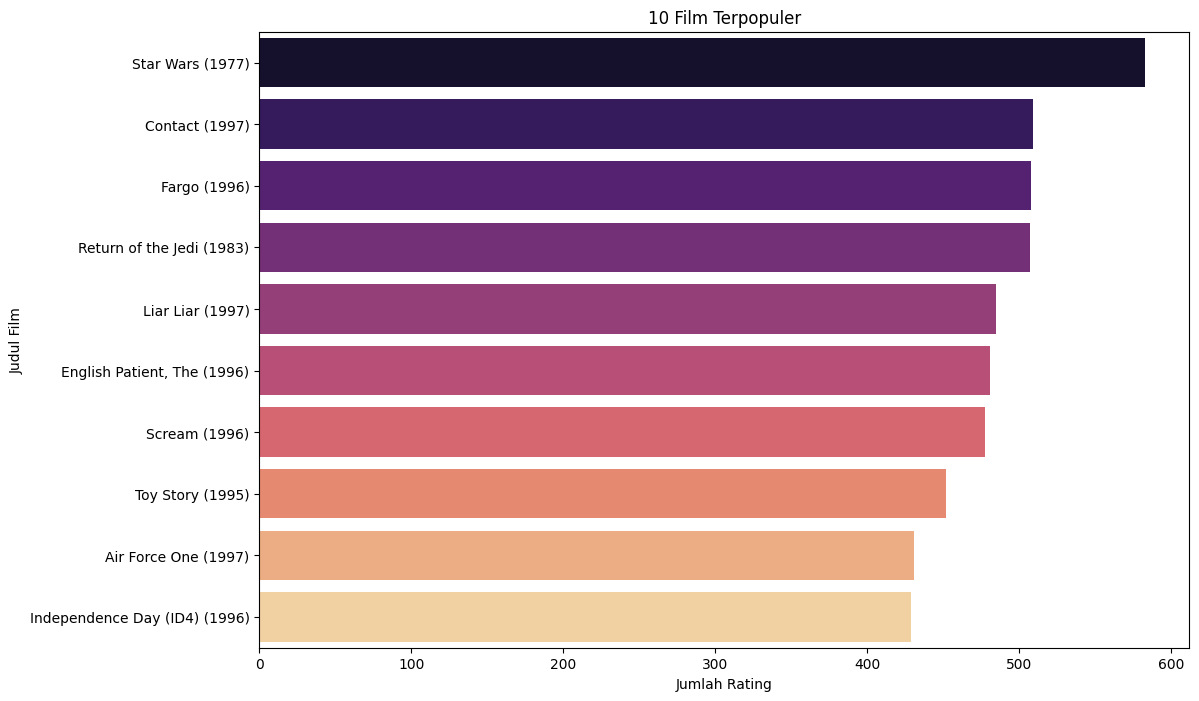

In [11]:
# Visualisasi 10 film terpopuler
plt.figure(figsize=(12,8))
sns.barplot(x='rating_count', y='title', data=movie_counts.head(10), palette='magma')
plt.title('10 Film Terpopuler')
plt.xlabel('Jumlah Rating')
plt.ylabel('Judul Film')
plt.show()


Insight: Beberapa film menerima lebih banyak perhatian, yang bisa mempengaruhi model rekomendasi. Film dengan jumlah rating tinggi mungkin lebih dikenal dan diminati oleh pengguna.

---

# Data Preparation

Langkah-langkah data preparation yang dilakukan:

Merging Data: Menggabungkan data rating dengan data film untuk mendapatkan informasi lengkap.
Membuat User-Item Matrix: Membuat matriks interaksi pengguna dengan item (film) yang akan digunakan sebagai input untuk algoritma rekomendasi.
Normalisasi Data: Melakukan normalisasi data untuk menghilangkan bias rating antar pengguna.

## 1. Merging Data

In [12]:
# Menggabungkan data ratings dengan judul film
ratings = pd.merge(ratings, movies, on='item_id')

# Menampilkan data setelah penggabungan
ratings.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## 2.Data Splitting

In [13]:
# Fungsi untuk membagi data per pengguna
def train_test_split_per_user(ratings, test_size=0.2, min_ratings=5, random_state=42):
    train_list = []
    test_list = []
    
    for user, group in ratings.groupby('user_id'):
        if len(group) >= min_ratings:
            train_grp, test_grp = train_test_split(
                group, test_size=test_size, random_state=random_state
            )
            train_list.append(train_grp)
            test_list.append(test_grp)
        else:
            # Menugaskan semua rating ke training jika jumlah rating kurang dari min_ratings
            train_list.append(group)
    
    train_data = pd.concat(train_list).reset_index(drop=True)
    test_data = pd.concat(test_list).reset_index(drop=True)
    
    return train_data, test_data

In [14]:
train_data, test_data = train_test_split_per_user(ratings, test_size=0.2, min_ratings=5, random_state=42)


## 3. Membuat User-Item Matrix

In [15]:
# Membuat Matriks User-Item untuk Training dan Testing
train_matrix = train_data.pivot_table(index='user_id', columns='title', values='rating').fillna(0)
test_matrix = test_data.pivot_table(index='user_id', columns='title', values='rating').fillna(0)

## 4. Normalisasi Data

In [18]:
# Melakukan Normalisasi pada Matriks Training
scaler = StandardScaler()
train_matrix_scaled = scaler.fit_transform(train_matrix)

# Mengubah kembali matriks yang sudah diskalakan menjadi DataFrame
train_matrix_scaled = pd.DataFrame(train_matrix_scaled, index=train_matrix.index, columns=train_matrix.columns)

# Menjamin bahwa matriks testing memiliki kolom yang sama dengan matriks training
test_matrix = test_matrix.reindex(columns=train_matrix.columns, fill_value=0)

---

# Modeling

## 1. Collaborative Filtering

### User-Based Collaborative Filtering

In [31]:
user_similarity = cosine_similarity(train_matrix_scaled)
user_similarity_df = pd.DataFrame(user_similarity, index=train_matrix_scaled.index, columns=train_matrix_scaled.index)

def user_based_recommendations(user_id, num_recommendations=5):
    if user_id not in user_similarity_df.index:
        print(f"User ID {user_id} not found in similarity matrix.")
        return []
    
    # Mendapatkan skor kesamaan untuk pengguna
    similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False)
    
    # Menghapus pengguna itu sendiri dari daftar pengguna serupa
    similar_users = similar_users.drop(user_id, errors='ignore')
    
    # Mendapatkan rating pengguna serupa
    similar_users_ratings = train_matrix.loc[similar_users.index]
    
    # Menghitung jumlah bobot dari kesamaan
    sum_of_weights = similar_users.sum()
    
    if sum_of_weights == 0:
        return []
    
    # Memperkirakan rating
    pred_ratings = similar_users_ratings.T.dot(similar_users) / sum_of_weights
    
    # Mengambil film yang belum diberi rating oleh pengguna
    user_rated = train_matrix.loc[user_id]
    recommendations = pred_ratings[user_rated == 0].sort_values(ascending=False).head(num_recommendations)
    
    return recommendations.index.tolist()

## 2. Matrix Factorization (SVD)

In [46]:
# Perform SVD
k = 50
train_matrix_scaled_np = train_matrix_scaled.to_numpy()
U, sigma, Vt = svds(train_matrix_scaled_np, k=k)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=train_matrix.columns, index=train_matrix.index)

def svd_recommendations(user_id, num_recommendations=5):
    if user_id not in preds_df.index:
        print(f"User ID {user_id} not found in SVD predictions.")
        return []
    
    # Mendapatkan dan mengurutkan rating prediksi pengguna
    user_predictions = preds_df.loc[user_id].sort_values(ascending=False)
    
    # Mendapatkan rating aktual pengguna
    user_actual = train_matrix.loc[user_id]
    
    # Merekomendasikan film yang belum diberi rating
    recommendations = user_predictions[user_actual == 0].head(num_recommendations)
    
    return recommendations.index.tolist()

**Kelebihan dan Kekurangan**:

- **Collaborative Filtering**:
  - *Kelebihan*: Mudah diimplementasikan, tidak memerlukan data fitur item.
  - *Kekurangan*: Masalah data sparsity dan cold-start problem.

- **Matrix Factorization (SVD)**:
  - *Kelebihan*: Mengatasi sparsity, menangkap hubungan laten antar pengguna dan item.
  - *Kekurangan*: Lebih kompleks dan membutuhkan sumber daya komputasi lebih besar.
---

# Evaluation


## Evaluation Metrics

1. **Root Mean Square Error (RMSE)**: Mengukur perbedaan antara nilai yang diprediksi dan aktual.

   $$
   RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}
   $$

2. **Precision@K**: Proporsi item yang relevan dalam top-K rekomendasi.

   $$
   Precision@K = \frac{\text{Jumlah item relevan dalam K rekomendasi}}{K}
   $$

3. **Recall@K**: Proporsi item relevan yang berhasil direkomendasikan dalam top-K.

   $$
   Recall@K = \frac{\text{Jumlah item relevan dalam K rekomendasi}}{\text{Total item relevan}}
   $$

### 1. Menghitung RMSE

In [47]:
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

### 2. Menghitung Precision@K

In [48]:
# Fungsi untuk menghitung Precision@K
def precision_at_k(actual, predicted, k=5):
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / k

### 3. Menghitung Recall@K

In [49]:
def recall_at_k(actual, predicted, k=5):
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / len(actual_set) if len(actual_set) > 0 else 0

### 4. Memprediksi Rating

In [50]:
# Prediksi Rating Berdasarkan User-Based Collaborative Filtering
def user_based_predict_rating(user_id, movie_title):
    if user_id not in user_similarity_df.index:
        print(f"User ID {user_id} tidak ditemukan di matriks kesamaan.")
        return 0  # Atau nilai default lainnya
    
    if movie_title not in train_matrix.columns:
        print(f"Judul film '{movie_title}' tidak ditemukan di matriks training.")
        return 0  # Atau nilai default lainnya
    
    # Mendapatkan skor kesamaan untuk pengguna
    similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False)
    
    # Menghapus pengguna itu sendiri
    similar_users = similar_users.drop(user_id, errors='ignore')
    
    # Mendapatkan rating untuk film target dari pengguna serupa
    similar_users_ratings = train_matrix.loc[similar_users.index, movie_title]
    
    # Mendapatkan skor kesamaan pengguna serupa
    similarity_scores = similar_users
    
    # Menghitung rata-rata tertimbang
    if similarity_scores.sum() == 0:
        return 0  # Menghindari pembagian dengan nol
    predicted_rating = np.dot(similarity_scores, similar_users_ratings) / similarity_scores.sum()
    
    return predicted_rating

### 5. Evaluate

In [51]:
# Inisialisasi daftar untuk menyimpan metrik evaluasi
rmse_svd = []
precision_svd = []
recall_svd = []

rmse_cf = []
precision_cf = []
recall_cf = []

# Iterasi melalui setiap pengguna di matriks testing
for user in test_matrix.index:
    try:
        # Mendapatkan rating aktual untuk pengguna di testing set
        actual_ratings = test_matrix.loc[user]
        actual_movies = actual_ratings[actual_ratings > 0].index.tolist()
        
        if not actual_movies:
            continue  # Melewati pengguna tanpa rating di testing set
        
        # Mendapatkan rekomendasi dari SVD
        svd_recommended = svd_recommendations(user, num_recommendations=5)
        
        # Mendapatkan rekomendasi dari User-Based Collaborative Filtering
        cf_recommended = user_based_recommendations(user, num_recommendations=5)
        
        # Menghitung RMSE untuk SVD
        svd_predicted = preds_df.loc[user, actual_movies]
        svd_actual = test_matrix.loc[user, actual_movies]
        rmse_svd.append(calculate_rmse(svd_actual, svd_predicted))
        
        # Menghitung RMSE untuk User-Based Collaborative Filtering
        cf_predicted_ratings = [user_based_predict_rating(user, movie) for movie in actual_movies]
        cf_actual_ratings = test_matrix.loc[user, actual_movies].values
        rmse_cf.append(calculate_rmse(cf_actual_ratings, cf_predicted_ratings))
        
        # Menghitung Precision@5 dan Recall@5 untuk SVD
        precision_svd.append(precision_at_k(actual_movies, svd_recommended, k=5))
        recall_svd.append(recall_at_k(actual_movies, svd_recommended, k=5))
        
        # Menghitung Precision@5 dan Recall@5 untuk User-Based Collaborative Filtering
        precision_cf.append(precision_at_k(actual_movies, cf_recommended, k=5))
        recall_cf.append(recall_at_k(actual_movies, cf_recommended, k=5))
    
    except KeyError as e:
        print(f"KeyError for user_id {user}: {e}")
        continue
    except Exception as e:
        print(f"Unexpected error for user_id {user}: {e}")
        continue

In [52]:
# Menghitung rata-rata metrik evaluasi untuk SVD
avg_rmse_svd = np.mean(rmse_svd) if rmse_svd else float('nan')
avg_precision_svd = np.mean(precision_svd) if precision_svd else float('nan')
avg_recall_svd = np.mean(recall_svd) if recall_svd else float('nan')

# Menghitung rata-rata metrik evaluasi untuk User-Based Collaborative Filtering
avg_rmse_cf = np.mean(rmse_cf) if rmse_cf else float('nan')
avg_precision_cf = np.mean(precision_cf) if precision_cf else float('nan')
avg_recall_cf = np.mean(recall_cf) if recall_cf else float('nan')

# Menampilkan hasil evaluasi
print("Hasil Evaluasi\n")
print("- Collaborative Filtering (User-Based):")
print(f"  - RMSE: {avg_rmse_cf:.2f}")
print(f"  - Precision@5: {avg_precision_cf:.2f}")
print(f"  - Recall@5: {avg_recall_cf:.2f}\n")

print("- Matrix Factorization (SVD):")
print(f"  - RMSE: {avg_rmse_svd:.2f}")
print(f"  - Precision@5: {avg_precision_svd:.2f}")
print(f"  - Recall@5: {avg_recall_svd:.2f}")

Hasil Evaluasi

- Collaborative Filtering (User-Based):
  - RMSE: 4.18
  - Precision@5: 0.18
  - Recall@5: 0.08

- Matrix Factorization (SVD):
  - RMSE: 3.50
  - Precision@5: 0.14
  - Recall@5: 0.04
